In [1]:
import sys
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import pickle

# Get the parent folder path (folder K)
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

print(parent_folder)

# Add folder A to the Python path
folder_classes_path = os.path.join(parent_folder, 'classes')
sys.path.append(folder_classes_path)

/Users/zeyichen/GitHub/Repo/WB_Algo/ICNN_Fan


In [2]:
from true_WB import *
from input_generate_plugin import *
from entropic_estimate_OT import *
from entropic_iterative_scheme import *
from config_log import *
from measure_visualize import *
from input_generate_entropy import *
from sample_plot import *

In [3]:
dim = 2
num_samples = 5000
num_measures = 5
iter = 0
truncated_radius = 150
seed = 1009

In [4]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.random_components(num_components=5, uniform_weights = True, seed = seed) # seed from the measure selection
# source_sampler.set_truncation(truncated_radius)

In [5]:
auxiliary_measure_sampler_set = []
for auxiliary_seed in [1010, 1018, 1014, 1016, 1003]:
    auxiliary_measure_sampler = MixtureOfGaussians(dim)
    auxiliary_measure_sampler.random_components(num_components=5, uniform_weights = True, seed = auxiliary_seed)
    # auxiliary_measure_sampler.set_truncation(truncated_radius)
    auxiliary_measure_sampler_set.append(auxiliary_measure_sampler)

In [6]:
# construct entropic_sampler
entropic_sampler = entropic_input_sampler(dim, 
                                          num_measures, 
                                          auxiliary_measure_sampler_set, 
                                          source_sampler = source_sampler, 
                                          n_k = 1000, 
                                          seed = 120, 
                                          gamma = 0.3, 
                                          manual = True,
                                          truncated_radius = truncated_radius,
                                          bound_type = "eigen_bound")

In [7]:
entropic_sampler.__dict__

{'dim': 2,
 'num_measures': 5,
 'auxiliary_measure_sampler_set': [<true_WB.MixtureOfGaussians at 0x182117ad0>,
 'tilde_K': 5,
 'source_sampler': <true_WB.MixtureOfGaussians at 0x117074f90>,
 'n_k': 1000,
 'seed': 120,
 'rng_entropy': RandomState(MT19937) at 0x1820ED140,
 'gamma': 0.3,
 'manual': True,
 'truncated_radius': 150,
 'bound_type': 'eigen_bound',
 'grid_size': 200}

source sampling: 100%|██████████| 1000/1000 [00:00<00:00, 10646.58it/s]


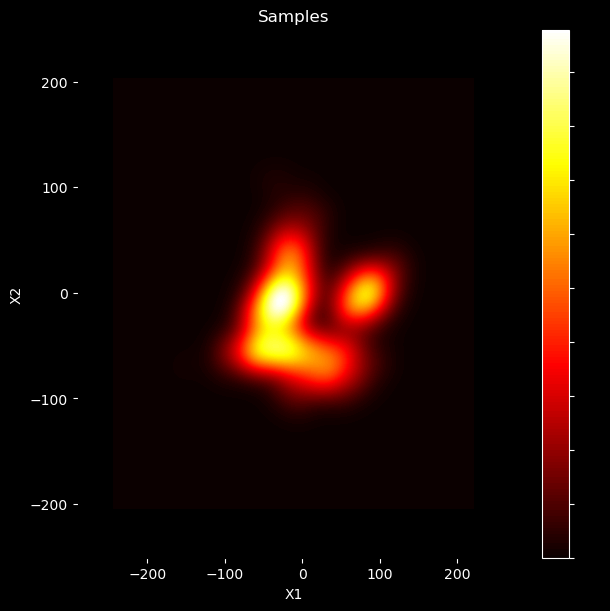

In [8]:
test_samples = entropic_sampler.auxiliary_measure_sampler_set[0].sample(1000)
plot_2d_source_measures_kde(test_samples, plot_dirc=False, scatter=False)

# Entropic Sampler Set-Up

In [ ]:
# generate strong convexity parameters of the mappings.
entropic_sampler.generate_strong_convexity_param()
print("strong convexity parameters all set.")

In [ ]:
# assign theta
entropic_sampler.assign_theta()
print("theta all set.")

In [ ]:
# generate Y matrices
entropic_sampler.generate_Y_matrices()
print("Y matrices all set.")

In [ ]:
# import jax
# jax.config.update("jax_enable_x64", True)

# generate g vectors
entropic_sampler.generate_g_vectors()
print("g vectors all set.")

In [ ]:
# generate smoothness parameters; this involves solving max eigen for each tilde_k
entropic_sampler.generate_smoothness_param()
print("smoothness parameters all set.")
print(entropic_sampler.smoothness_param_dict)

In [ ]:
# construct a surjective mapping to map component maps to their respective OT maps for generating input measures.
entropic_sampler.construct_surjective_mapping()
print("surjective mapping all set.")

In [ ]:
# generate A matrices
entropic_sampler.generate_A_matrices()
print("A matrices all set.")

In [ ]:
# check
for key, value in entropic_sampler.surjective_mapping.items():
    print(key, ' : ', value)

A_matrices_dict = entropic_sampler.A_matrices_dict
sum_matrix = np.zeros((dim, dim))
for i in range(num_measures):
    sum_matrix += A_matrices_dict[i]
print(f"The sum of the matrices is {sum_matrix}.")

# Set-up Over

In [8]:
result_dir = f"results/ICNN_{num_measures}_seed_{seed}_samples_{num_samples}_dim_{dim}"
os.makedirs(result_dir, exist_ok=True)

In [9]:
save_pathname = f"{result_dir}/input_and_source_samples"
plot_dirc = f"{save_pathname}/plots"
os.makedirs(plot_dirc, exist_ok=True)
csv_dirc = f"{save_pathname}/csv_files"
os.makedirs(csv_dirc, exist_ok=True)

In [10]:
# Load the sampler attributes from pkl files (only when the entropic_sampler has been set up)
with open(f"{result_dir}/entropic_sampler_info.pkl", "rb") as f:
    loaded_data_entropic_sampler = pickle.load(f)

with open(f"{result_dir}/source_sampler_info.pkl", "rb") as f:
    loaded_data_source_sampler = pickle.load(f)

print("Loaded Data for Entropic Sampler:", loaded_data_entropic_sampler)
print("Loaded Data for Source Sampler:", loaded_data_source_sampler)

Loaded Data for Entropic Sampler: {'dim': 2, 'num_measures': 5, 'auxiliary_measure_sampler_set': [<true_WB.MixtureOfGaussians object at 0x1805c3350>, <true_WB.MixtureOfGaussians object at 0x17f775290>, <true_WB.MixtureOfGaussians object at 0x1805b43d0>, <true_WB.MixtureOfGaussians object at 0x1805b4850>, <true_WB.MixtureOfGaussians object at 0x1805b4cd0>], 'tilde_K': 5, 'source_sampler': <true_WB.MixtureOfGaussians object at 0x1805b5210>, 'n_k': 1000, 'seed': 120, 'rng_entropy': RandomState(MT19937) at 0x13D008E40, 'gamma': 0.3, 'manual': True, 'truncated_radius': 150, 'bound_type': 'eigen_bound', 'grid_size': 200, 'strong_convexity_param_dict': {0: 0.0001, 1: 0.0001, 2: 0.0001, 3: 0.0001, 4: 0.0001}, 'theta_dict': {0: 10, 1: 10, 2: 10, 3: 10, 4: 10}, 'Y_matrix_dict': {0: array([[ 83.25389778,  -6.77748404],
       [-24.38674772, -23.76266702],
       [ 97.2196175 ,  -0.66185246],
       ...,
       [-35.17059538,  10.05658482],
       [-14.49614928, -84.75519572],
       [-10.84955811

In [11]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.__dict__.update(loaded_data_source_sampler)

entropic_sampler = entropic_input_sampler(dim, num_measures, auxiliary_measure_sampler_set, source_sampler = source_sampler, n_k = 1000, seed = 120)
entropic_sampler.__dict__.update(loaded_data_entropic_sampler)

In [12]:
entropic_sampler.__dict__

{'dim': 2,
 'num_measures': 5,
 'auxiliary_measure_sampler_set': [<true_WB.MixtureOfGaussians at 0x1805c3350>,
 'tilde_K': 5,
 'source_sampler': <true_WB.MixtureOfGaussians at 0x1805b5210>,
 'n_k': 1000,
 'seed': 120,
 'rng_entropy': RandomState(MT19937) at 0x13D008E40,
 'gamma': 0.3,
 'manual': True,
 'truncated_radius': 150,
 'bound_type': 'eigen_bound',
 'grid_size': 200,
 'strong_convexity_param_dict': {0: 0.0001,
  1: 0.0001,
  2: 0.0001,
  3: 0.0001,
  4: 0.0001},
 'theta_dict': {0: 10, 1: 10, 2: 10, 3: 10, 4: 10},
 'Y_matrix_dict': {0: array([[ 83.25389778,  -6.77748404],
         [-24.38674772, -23.76266702],
         [ 97.2196175 ,  -0.66185246],
         ...,
         [-35.17059538,  10.05658482],
         [-14.49614928, -84.75519572],
         [-10.84955811, -17.94279971]]),
  1: array([[-16.97145061,  91.46456815],
         [ 98.16619451, -18.46596147],
         [-75.22131842, -52.44109978],
         ...,
         [ 47.97628268,  31.75763179],
         [-78.94388382, -55.91

# Generate Input Samples 
We generate 60000 sample in preparation as did in Fan(2021)

In [14]:
num_samples_in_preparation = 60000

input_measure_samples = entropic_sampler.sample(num_samples_in_preparation)
for measure_index in range(num_measures):
    measure_samples = np.array(input_measure_samples[measure_index])
    # Save measure_samples to a CSV file
    csv_filename = os.path.join(csv_dirc, f"input_measure_samples_{measure_index}.csv")
    pd.DataFrame(measure_samples).to_csv(csv_filename, index=False, header=False)

    print(f"Start to plot the input measure {measure_index}")
    plot_2d_input_measure_kde(measure_samples[:1000], measure_index, plot_dirc = plot_dirc, scatter = False)
    print(f"Finish plotting the input measure {measure_index}")

Generating 60000 input measure samples: 100%|██████████| 60000/60000 [05:55<00:00, 168.74it/s]


Start to plot the input measure 0
Finish plotting the input measure 0
Start to plot the input measure 1
Finish plotting the input measure 1
Start to plot the input measure 2
Finish plotting the input measure 2
Start to plot the input measure 3
Finish plotting the input measure 3
Start to plot the input measure 4
Finish plotting the input measure 4


In [16]:
true_bary_samples = source_sampler.sample(num_samples_in_preparation)
csv_filename = os.path.join(csv_dirc, f"true_barycenter_samples.csv")
pd.DataFrame(true_bary_samples).to_csv(csv_filename, index=False, header=False)
plot_2d_source_measures_kde(true_bary_samples[:1000], plot_dirc = plot_dirc, scatter = False)


source sampling: 100%|██████████| 60000/60000 [00:04<00:00, 12581.06it/s]
